<a href="https://colab.research.google.com/github/Aicoaching2025/Life-Expectancy/blob/main/Life_Expectancy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

🔍 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          96 non-null     object 
 1   Year             96 non-null     int64  
 2   Life_Expectancy  96 non-null     float64
 3   GDP              96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None

📊 Summary Statistics:
              Year  Life_Expectancy           GDP
count    96.000000        96.000000  9.600000e+01
mean   2007.500000        72.789583  3.880499e+12
std       4.633971        10.672882  5.197561e+12
min    2000.000000        44.300000  4.415703e+09
25%    2003.750000        74.475000  1.733018e+11
50%    2007.500000        76.750000  1.280220e+12
75%    2011.250000        78.

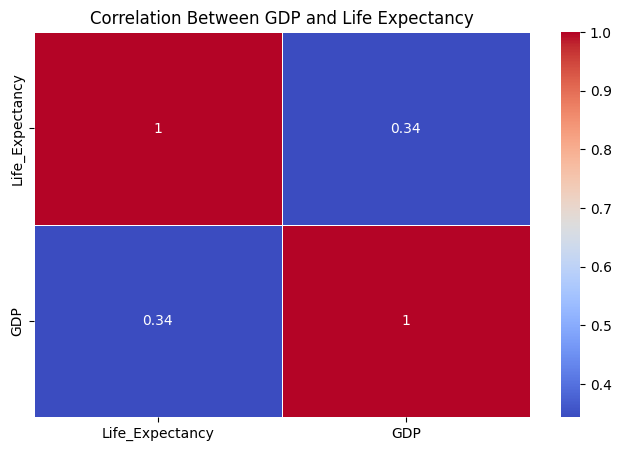

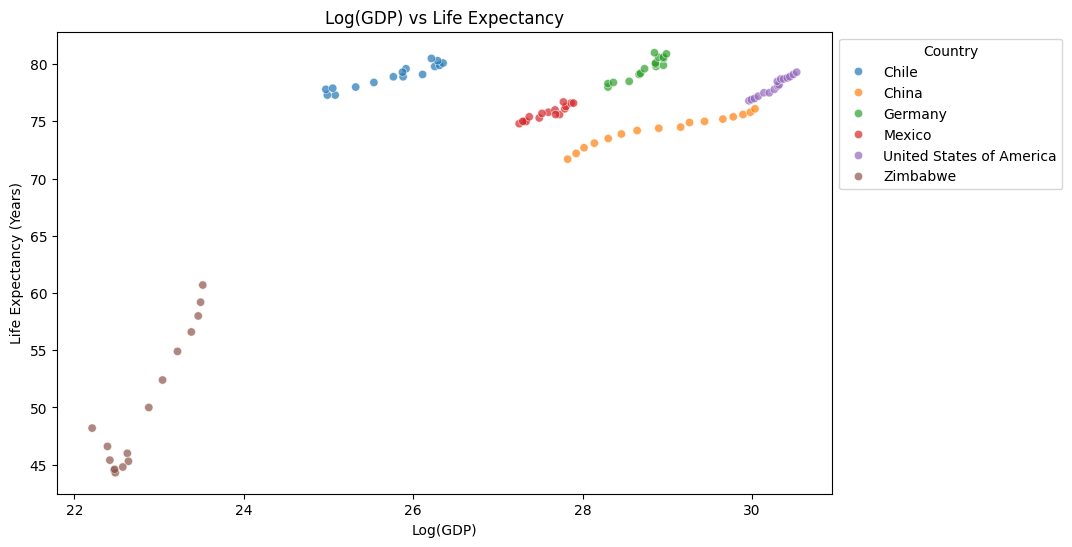

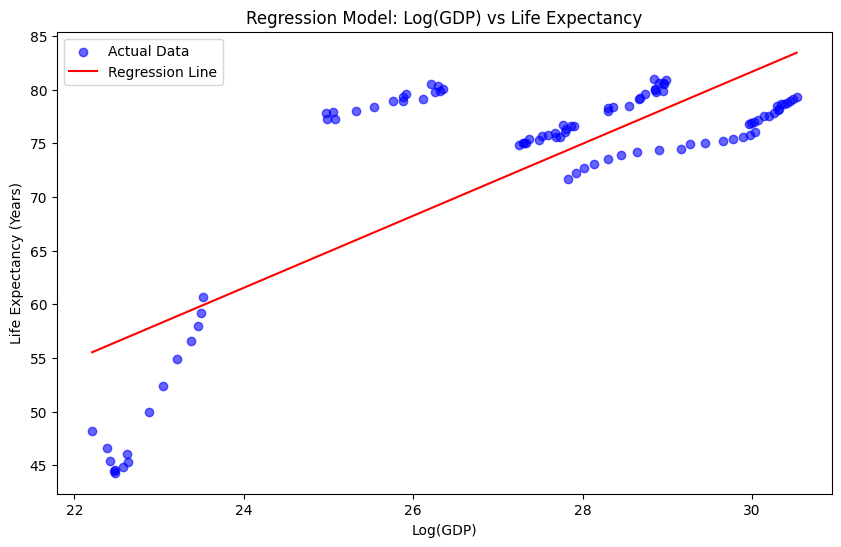


📌 Regression Model Summary:
                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     153.3
Date:                Tue, 18 Feb 2025   Prob (F-statistic):           1.86e-21
Time:                        02:42:59   Log-Likelihood:                -316.58
No. Observations:                  96   AIC:                             637.2
Df Residuals:                      94   BIC:                             642.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -19.0013  

<Figure size 640x480 with 0 Axes>

In [5]:
# Install necessary packages if not already installed
!pip install pandas numpy matplotlib seaborn statsmodels --quiet

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from google.colab import drive
drive.mount('/content/drive')

# Load Dataset
file_path = "/content/drive/MyDrive/Life-Expectancy-and-GDP-Starter/all_data.csv"  # Update the path if needed
df = pd.read_csv(file_path)

# Rename columns for easier access
df.rename(columns={"Life expectancy at birth (years)": "Life_Expectancy"}, inplace=True)

# Display dataset info
print("\n🔍 Dataset Information:")
print(df.info())
print("\n📊 Summary Statistics:")
print(df.describe())

# -------------------- 📌 CORRELATION ANALYSIS --------------------
plt.figure(figsize=(8, 5))
sns.heatmap(df.drop(columns=["Country", "Year"]).corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Between GDP and Life Expectancy")
plt.show()

# -------------------- 📌 SCATTER PLOT: Log(GDP) vs Life Expectancy --------------------
plt.figure(figsize=(10, 6))
sns.scatterplot(x=np.log(df["GDP"]), y=df["Life_Expectancy"], hue=df["Country"], alpha=0.7)
plt.title("Log(GDP) vs Life Expectancy")
plt.xlabel("Log(GDP)")
plt.ylabel("Life Expectancy (Years)")
plt.legend(bbox_to_anchor=(1, 1), title="Country")
plt.show()

# -------------------- 📌 REGRESSION ANALYSIS --------------------
X = np.log(df["GDP"])  # Log transformation of GDP
y = df["Life_Expectancy"]
X = sm.add_constant(X)  # Add intercept for regression
model = sm.OLS(y, X).fit()

# Predictive Modeling
pred_gdp_values = np.linspace(df["GDP"].min(), df["GDP"].max(), 100)
pred_X = sm.add_constant(np.log(pred_gdp_values))
pred_y = model.predict(pred_X)

# -------------------- 📌 REGRESSION PLOT --------------------
plt.figure(figsize=(10, 6))
plt.scatter(np.log(df["GDP"]), df["Life_Expectancy"], label="Actual Data", color="blue", alpha=0.6)
plt.plot(np.log(pred_gdp_values), pred_y, color="red", label="Regression Line")
plt.xlabel("Log(GDP)")
plt.ylabel("Life Expectancy (Years)")
plt.title("Regression Model: Log(GDP) vs Life Expectancy")
plt.legend()
plt.show()

# -------------------- 📌 DISPLAY MODEL SUMMARY --------------------
print("\n📌 Regression Model Summary:")
print(model.summary())

# -------------------- 📌 EXPORT RESULTS --------------------
# Save figures (optional, for GitHub or presentation)
plt.savefig("correlation_heatmap.png")
plt.savefig("gdp_vs_life_expectancy.png")
plt.savefig("regression_model.png")

# Save model summary to a text file
with open("model_summary.txt", "w") as f:
    f.write(str(model.summary()))

print("\n✅ Analysis complete. Visualizations and summary exported successfully!")
